# Описание проекта

У нас есть данные развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Нужно разобраться в причинах и помочь компании выйти в плюс.

**Выводы** [тык](#Напишите-выводы)


**Описание данных**


Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import timedelta
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных 

In [63]:
visits = pd.read_csv('/datasets/visits_info_short.csv' if os.path.exists('/datasets/visits_info_short.csv')\
                     else './datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv' if os.path.exists('/datasets/orders_info_short.csv')\
                     else './datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv' if os.path.exists('/datasets/costs_info_short.csv')\
                    else './datasets/costs_info_short.csv')

In [64]:
# названия колонок перевел в snake_case для удобства
for k in [visits, orders, costs]:
    k.columns = ['_'.join(i.strip().lower().split(' ')) for i in k.columns.values]

## visits

In [65]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [66]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [67]:
visits.describe()

,user_id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


Пропусков в таблице `visits` нет, отрицательных значений тоже.

In [68]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [69]:
visits.dtypes

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

## orders

In [70]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [71]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [72]:
orders.describe()

,user_id,revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


In [73]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [74]:
orders.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

## costs

In [75]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [76]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [77]:
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [78]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [79]:
costs.dtypes

dt          object
channel     object
costs      float64
dtype: object

Пропусков не обнаружено, проделано приведение типов данных.

# Функции анализа LTV, ROI, удержания и конверсии


In [80]:
# функция для создания пользовательских профилей

def get_profiles(sessions, 
                 orders,
                #events,
                 ad_costs
                 #event_names=[]
                ):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
#     for event in event_names:
#         if event in events['event_name'].unique():
#             profiles[event] = profiles['user_id'].isin(
#                 events.query('event_name == @event')['user_id'].unique()
#             )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [81]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [82]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [83]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [84]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [85]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [86]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [87]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(25, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# EDA

- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [88]:
profiles = get_profiles(visits, orders, costs)

In [89]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [90]:
profiles.duplicated().sum()

0

In [91]:
profiles.isna().sum()

user_id             0
first_ts            0
channel             0
device              0
region              0
dt                  0
month               0
payer               0
acquisition_cost    0
dtype: int64

In [92]:
profiles['dt'].agg({'min_data': 'min', 'max_data': 'max'})

min_data    2019-05-01
max_data    2019-10-27
Name: dt, dtype: object

У нас данные с 1 мая по 27 октября. Всё сходится.

## Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?

In [93]:
profiles.pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])\
        .reset_index()\
        .droplevel(1, axis=1)\
        .rename(columns={'count': 'users', 'sum': 'paid_users', 'mean': 'ratio'})\
        .sort_values('ratio', ascending=False)\
        .style.format({'ratio': '{:.2%}'})

,region,users,paid_users,ratio
3,United States,100002,6902,6.90%
1,Germany,14981,616,4.11%
2,UK,17575,700,3.98%
0,France,17450,663,3.80%


In [94]:
px.bar(profiles.groupby(['region', 'payer']).agg({'user_id': 'nunique'}).reset_index(),
       x='region', y='user_id',
       color='payer',
       height=500, title='Количество платящих и неплатящих пользователей по странам')

По графику видно, что поток приходящих пользователей из США больше трех европейских регионов, вместе взятых.
Количество платящих пользователей также лидирует для пользователей США.

## Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?

In [95]:
profiles.pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])\
        .reset_index()\
        .droplevel(1, axis=1)\
        .rename(columns={'count': 'users', 'sum': 'paid_users', 'mean': 'ratio'})\
        .sort_values('ratio', ascending=False)\
        .style.format({'ratio': '{:.2%}'})

,device,users,paid_users,ratio
1,Mac,30042,1912,6.36%
3,iPhone,54479,3382,6.21%
0,Android,35032,2050,5.85%
2,PC,30455,1537,5.05%


In [96]:
px.bar(profiles.groupby(['region', 'device']).agg({'user_id': 'nunique'}).reset_index(),
       y='device', x='user_id', orientation='h',
       color='region', title='Количество пользователей по девайсам и странам')

Из этого графика видно, что больше всего пользователей с мобильных платформ пользуются услугами рассматриваемого сервиса.

In [97]:
px.bar(profiles.query('payer == True').groupby(['region', 'device']) \
       .agg({'user_id': 'nunique'}).reset_index(),
       y='device', x='user_id', orientation='h',
       color='region', title='Количество платящих пользователей по девайсам и странам')

А из этого графика видно, что платящие пользователи в основном используют iPhone и они изи США. Для регионов Европы это PC

## По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [98]:
profiles.pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])\
        .reset_index()\
        .droplevel(1, axis=1)\
        .rename(columns={'count': 'users', 'sum': 'paid_users', 'mean': 'ratio'})\
        .sort_values('ratio', ascending=False)\
        .style.format({'ratio': '{:.2%}'})

,channel,users,paid_users,ratio
1,FaceBoom,29144,3557,12.20%
0,AdNonSense,3880,440,11.34%
9,lambdaMediaAds,2149,225,10.47%
6,TipTop,19561,1878,9.60%
5,RocketSuperAds,4448,352,7.91%
7,WahooNetBanner,8553,453,5.30%
8,YRabbit,4312,165,3.83%
3,MediaTornado,4364,156,3.57%
2,LeapBob,8553,262,3.06%
4,OppleCreativeMedia,8605,233,2.71%


In [99]:
px.bar(profiles.groupby(['region', 'channel']).agg({'user_id': 'nunique'}).reset_index(),
       y='channel', x='user_id', orientation='h',
       color='region', title='Количество пользователей по каналам привлечения')

In [100]:
px.bar(profiles.query('payer == True').groupby(['region', 'channel']) \
       .agg({'user_id': 'nunique'}).reset_index(),
       y='channel', x='user_id', orientation='h',
       color='region', title='Количество платящих пользователей по каналам привлечения')

Из этих двух графиков видно, что существуют два типа каналов. Те, которые работают в США и Европе + органика для всех. Больше всего пользователей приходит из каналов США -- FaceBoom, TipTop. Также видно, что в регионах европы в сумме органический канал приносит примерно столько же, сколько топовые рекламные компании -- WahooNetBanner или AdNonSense

# Маркетинг

## Сколько денег потратили? Всего / на каждый источник / по времени

In [101]:
px.bar(profiles.agg({'acquisition_cost': 'sum'}),
       height=250, orientation='h',
       title='Количество денег, потраченных на маркетинг')

Компания потратила 106 тысяч долларов на все рекламные компании

In [102]:
px.bar(profiles.groupby('channel') \
       .agg({'acquisition_cost': 'sum'}) \
       .sort_values('acquisition_cost', ascending=False).reset_index(),
       x='channel', y='acquisition_cost',
       title='Количество денег, потраченных на канал привлечения')

Те самые 4 топовых канала в топе по тратам денег на них. Можно предположить, что реклама в США работает лучше, чем в Европе, но этих графиков пока недостаточно, чтобы точно сделать такой вывод.

In [103]:
px.bar(profiles.groupby('month').agg({'acquisition_cost': 'sum'}).reset_index(),
       x='month', y='acquisition_cost', height=500,
       title='Месячные траты на маркетинг')

В сентябре потратили больше всего денег на рекламу. Больше 20 тысяч долларов

In [104]:
px.bar(profiles.groupby('dt').agg({'acquisition_cost': 'sum'}).reset_index(),
       x='dt', y='acquisition_cost', height=450,
       title='Дневные траты на маркетинг')

28 сентября 1075 долларов - максимально, а 15 мая 230 долларов - минимально

In [105]:
px.line(profiles.groupby(['dt', 'channel']).agg({'acquisition_cost': 'sum'}).reset_index(),
        x='dt', y='acquisition_cost', color='channel', title='Динамика дневных затрат по каналам')

In [106]:
px.line(profiles.groupby(['month', 'channel']).agg({'acquisition_cost': 'sum'}).reset_index(),
        x='month', y='acquisition_cost', color='channel', title='Динамика месячных затрат по каналам')

## Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [107]:
px.bar(profiles.groupby('channel').agg({'acquisition_cost': 'mean'})\
       .sort_values('acquisition_cost', ascending=False).reset_index(),
       x='channel', y='acquisition_cost', height=450,
       title='Месячные траты на маркетинг')

В TipTop оочень дорогие пользователи. Большее чем в 2 раза дороже, чем предшественник.

# Оценка окупаемости рекламы для привлечения пользователей

- Общая окупаемость рекламы;
- Окупаемость рекламы с разбивкой по устройствам;
- Окупаемость рекламы с разбивкой по странам;
- Окупаемость рекламы с разбивкой по рекламным каналам.

In [108]:
observ_date = profiles.first_ts.max()
horizon_days = 14

### Проанализируйте общую окупаемость рекламы

In [109]:
ltv_raw, ltv, ltv_hist, roi, roi_hist = get_ltv(profiles.\
                                                query('channel != "organic"'),
                                                orders,
                                                observ_date, 
                                                horizon_days,
                                                dimensions=[])

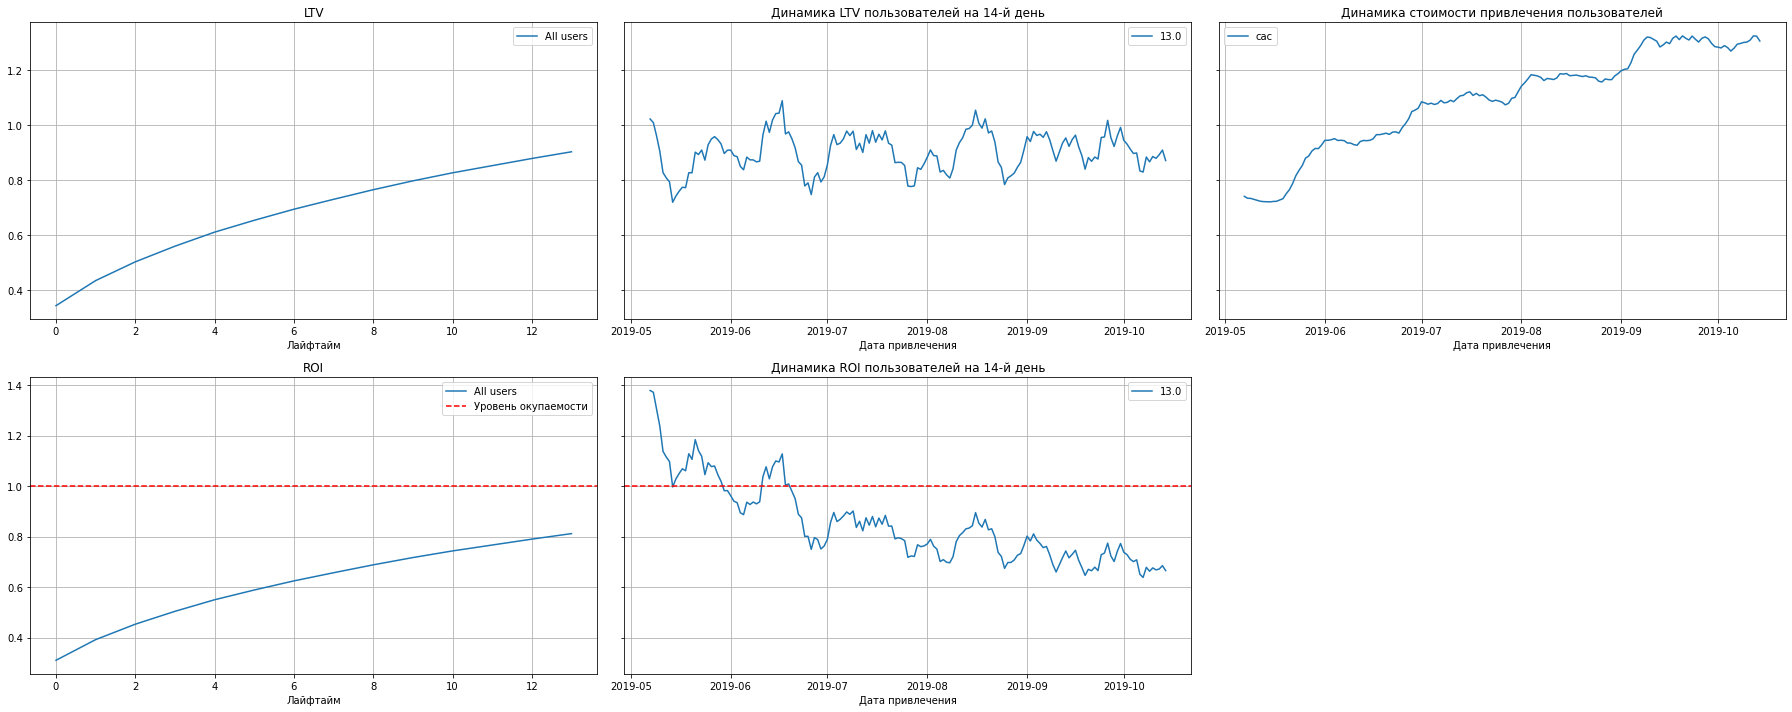

In [110]:
plot_ltv_roi(ltv, ltv_hist, roi, roi_hist, horizon_days, window=7)

ROI за 14 дней так и не дошел до линии оккупаемости. За 14 дней мы не успели выйти в 0 от закупки рекламы. Еще одна печаль в том, что динамика ROI падает. То есть сам график ROI становится параллелен оси ox, рост замедляется. Стоимость привлечения пользователя дорожает.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

In [111]:
ltv_raw, ltv, ltv_hist, roi, roi_hist = get_ltv(profiles.query('channel != "organic"'),
                                                orders,
                                                observ_date, 
                                                horizon_days,
                                                dimensions=['device'])

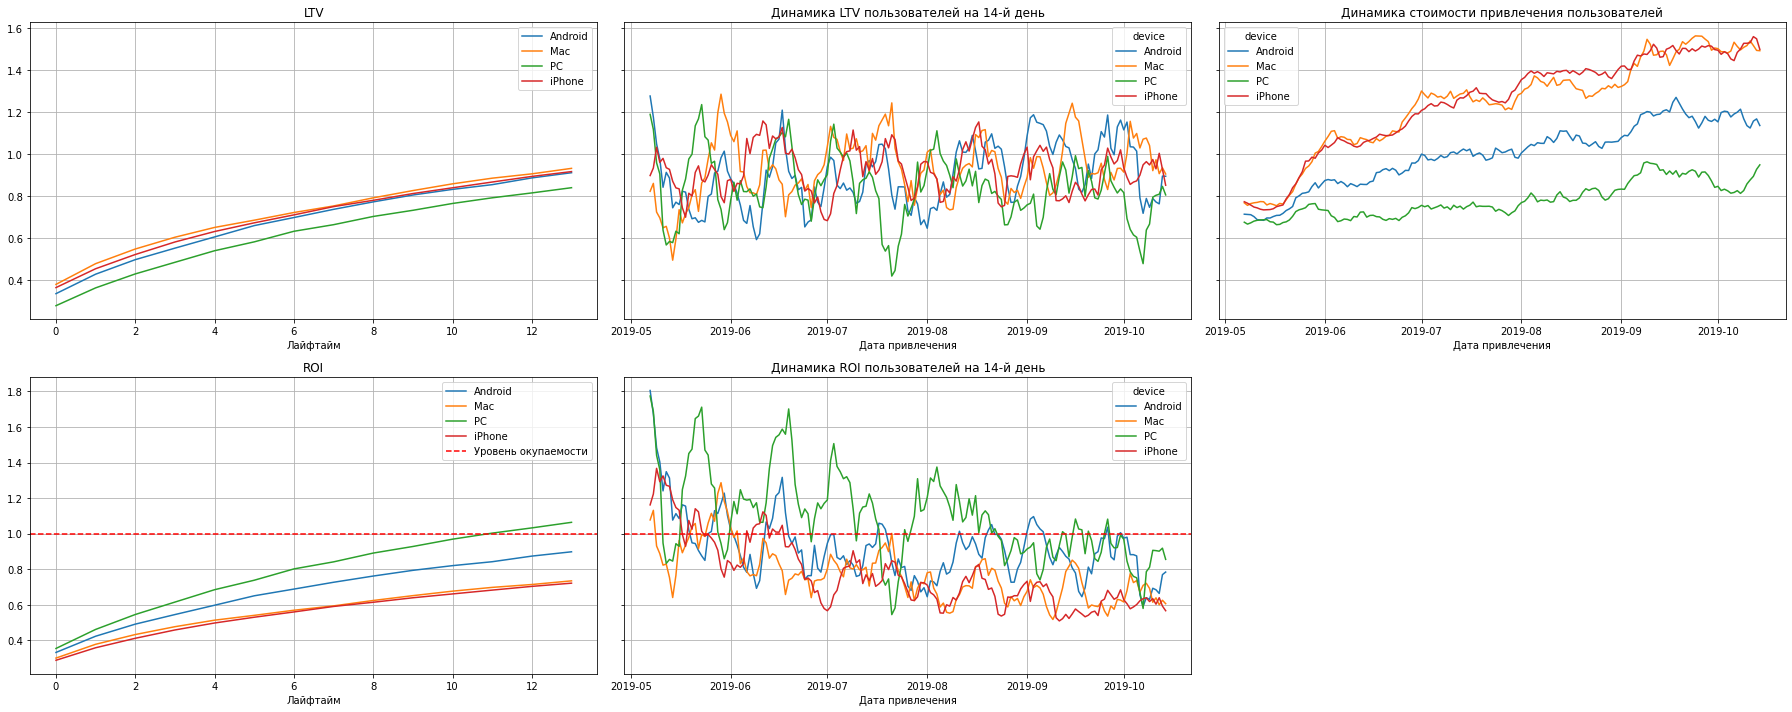

In [112]:
plot_ltv_roi(ltv, ltv_hist, roi, roi_hist, horizon_days, window=7)

Из этого нрафика видно, что пользователи устройств Apple и Android не окупились к концу лайфтайма. А вот пользователи PC, значительная доля которых европейские пользователи, успели окупиться и принести небольшую прибыль.

### Проанализируйте окупаемость рекламы с разбивкой по странам

In [113]:
ltv_raw, ltv, ltv_hist, roi, roi_hist = get_ltv(profiles.query('channel != "Organic"'),
                                                orders,
                                                observ_date, 
                                                horizon_days,
                                                dimensions=['region'])

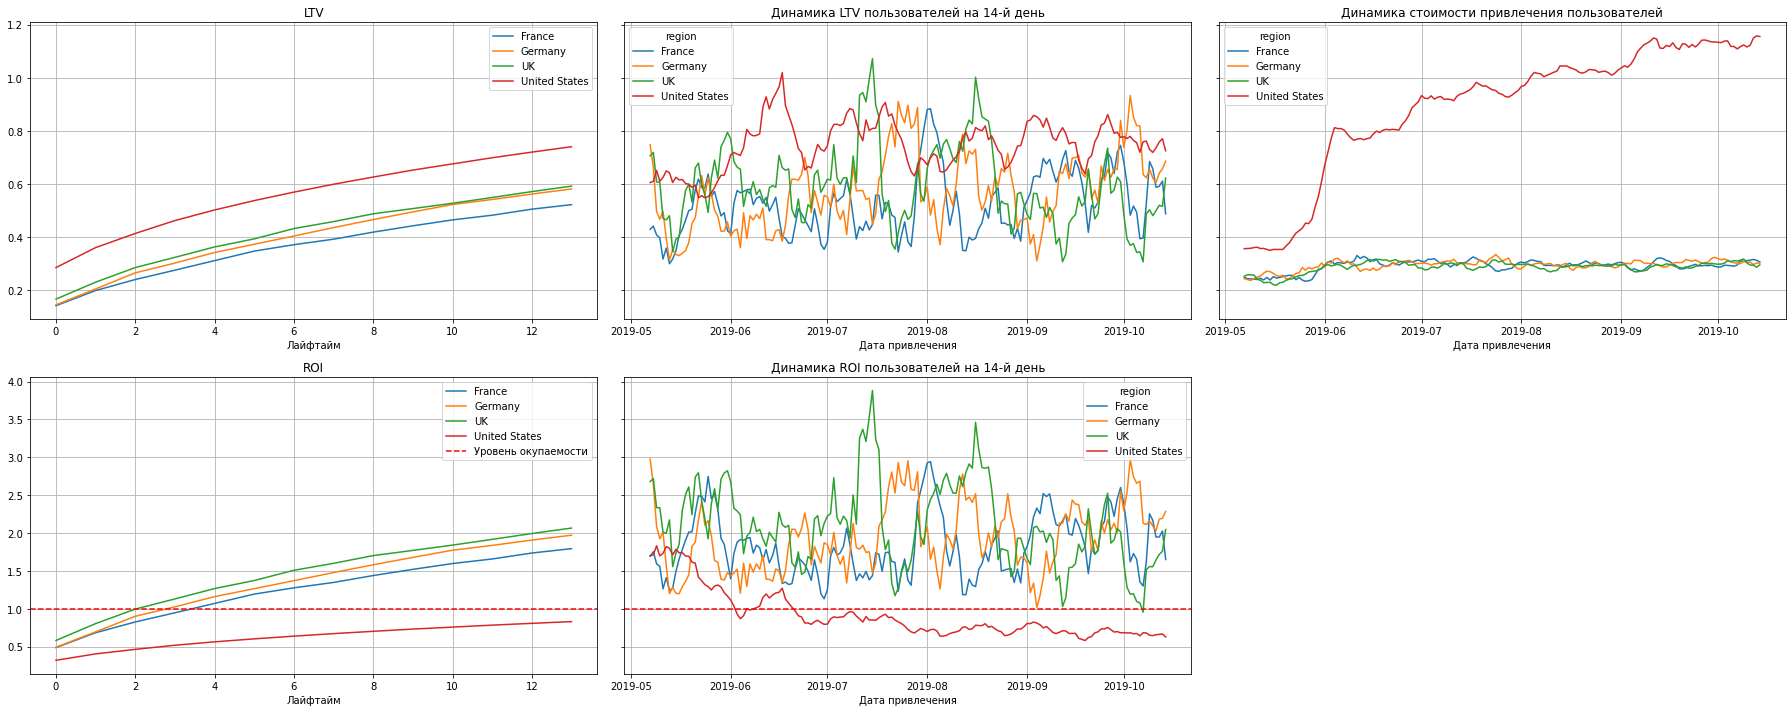

In [114]:
plot_ltv_roi(ltv, ltv_hist, roi, roi_hist, horizon_days, window=7)

Этот график подтверждает теорию. Европейские страны приносят нам прибыль, а вот США -- нет. ROI США растет очень медленно и не окупается. 

На графике стоимости привлечения одного юзера виден огромный отскок цены вверх. Это странно. Хорошо было бы разобраться почему пользователи стоят так дорого. Например, посмотреть личный кабинет закупки рекламы самого дорогого канала TipTop'а, написать в поддержку.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

In [115]:
ltv_raw, ltv, ltv_hist, roi, roi_hist = get_ltv(profiles.query('channel != "organic"'),
                                                orders,
                                                observ_date, 
                                                horizon_days,
                                                dimensions=['channel'])

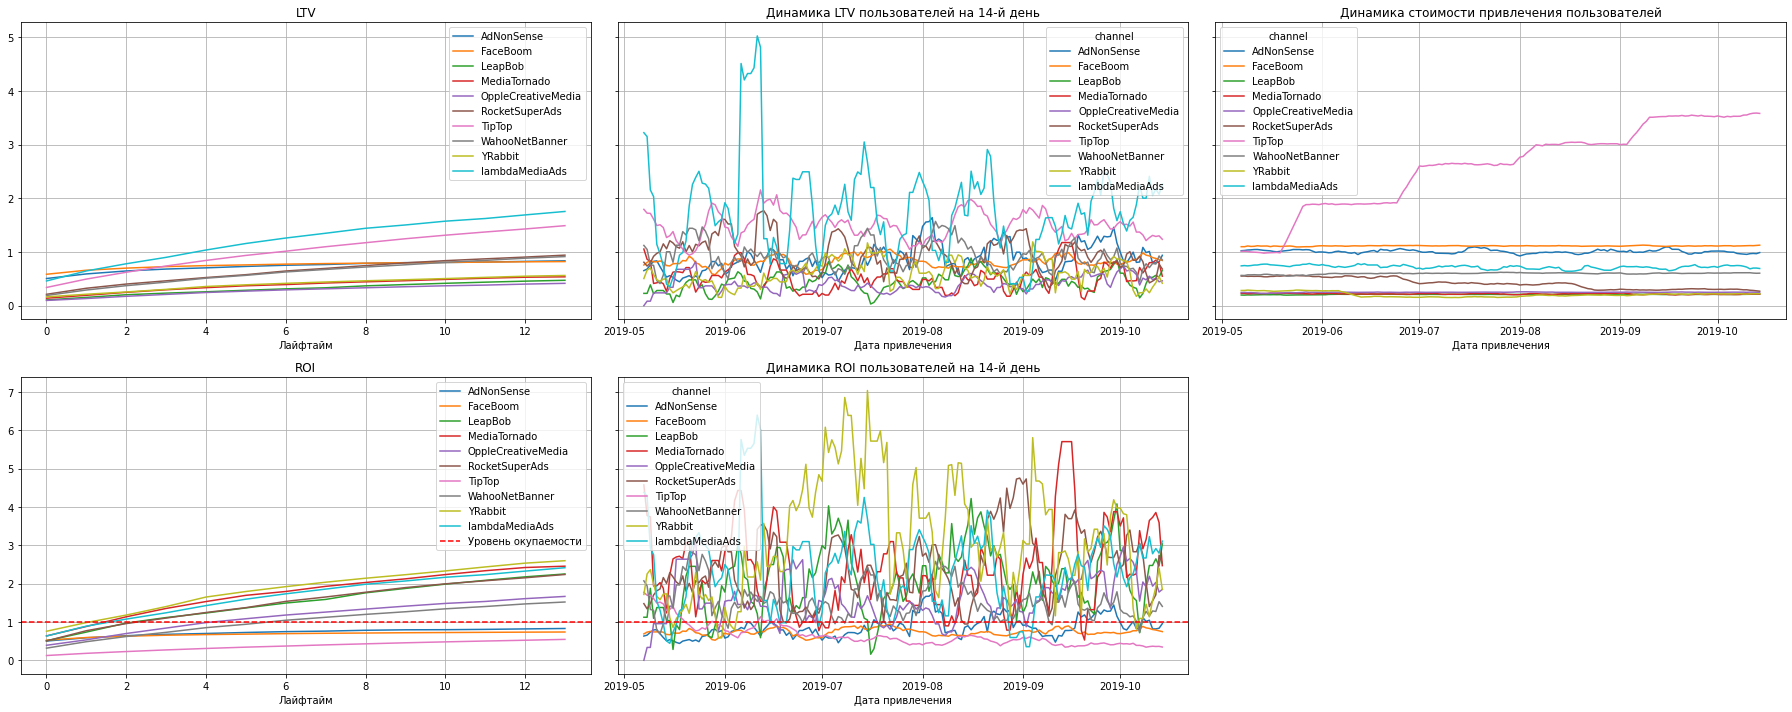

In [116]:
plot_ltv_roi(ltv, ltv_hist, roi, roi_hist, horizon_days, window=7)

А вот еще один график, который подтверждает, что причина наших убытков канал ТикТока. Стоимость пользователя там растет сумасшедшими темпами. Почти как перевернутая награда за блок в сети биткоина. От этой сети пора отказаться на время, пока эта проблема не устранится, иначе компания рискует потерять очень много денег. 

Также видно, что каналы AdNonSence и FaceBoom не успевают окупиться. Динамика их ROI тоже не очень хорошая. Стабильно ниже единицы.

TipTop, Faceboom и AdNonSense - крупные сети. Там как правило реклама стоит действительно дороже. Но по графикам она менее эффективная. Пользователи там одни из самых дорогих, а вот прибыли с них не много. Нужно решить эту проблему. Один из выходов -- отказаться от этих каналов привлечения, или закупать там меньше юзеров.

### Конверсия и удержание

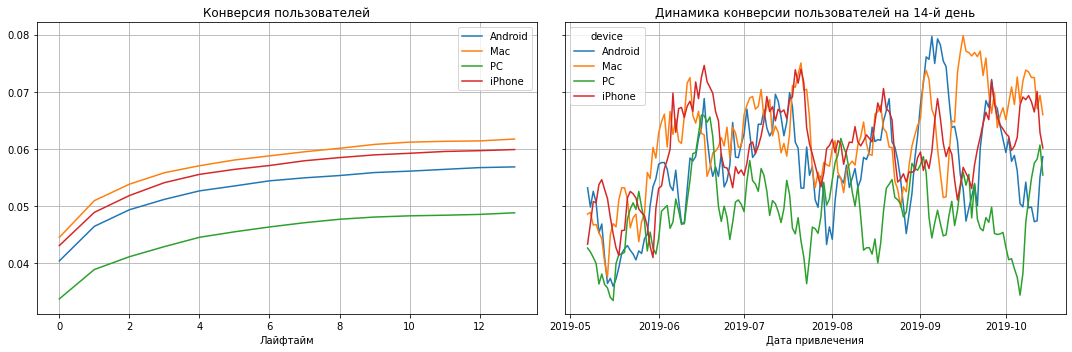

In [117]:
result_raw, conversion, conversion_history = get_conversion(profiles,
                                                            orders,
                                                            observ_date,
                                                            horizon_days,
                                                            dimensions=['device'])

plot_conversion(conversion, conversion_history, horizon_days, window=7)

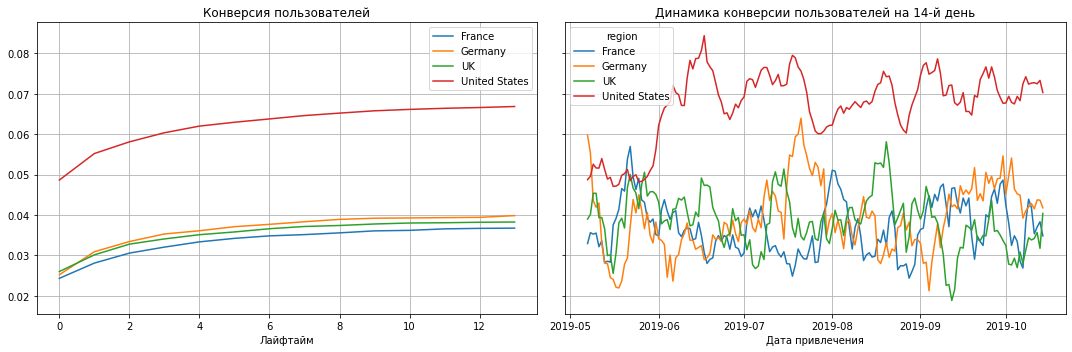

In [118]:
result_raw, conversion, conversion_history = get_conversion(profiles,
                                                            orders,
                                                            observ_date,
                                                            horizon_days,
                                                            dimensions=['region'])

plot_conversion(conversion, conversion_history, horizon_days, window=7)

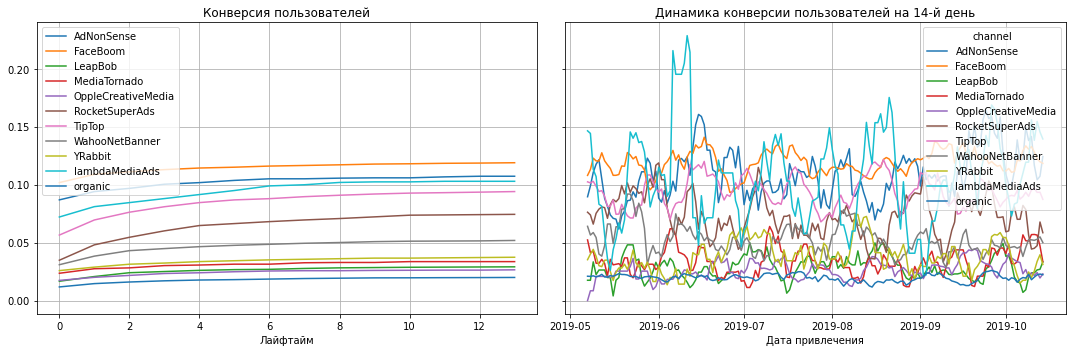

In [119]:
result_raw, conversion, conversion_history = get_conversion(profiles,
                                                            orders,
                                                            observ_date,
                                                            horizon_days,
                                                            dimensions=['channel'])
plot_conversion(conversion, conversion_history, horizon_days, window=7)

В США, на iPhone и Mac устройствах, с каналов FaceBoom, lambdaMediaAds и TipTop самые лучшие показатели конверсии.

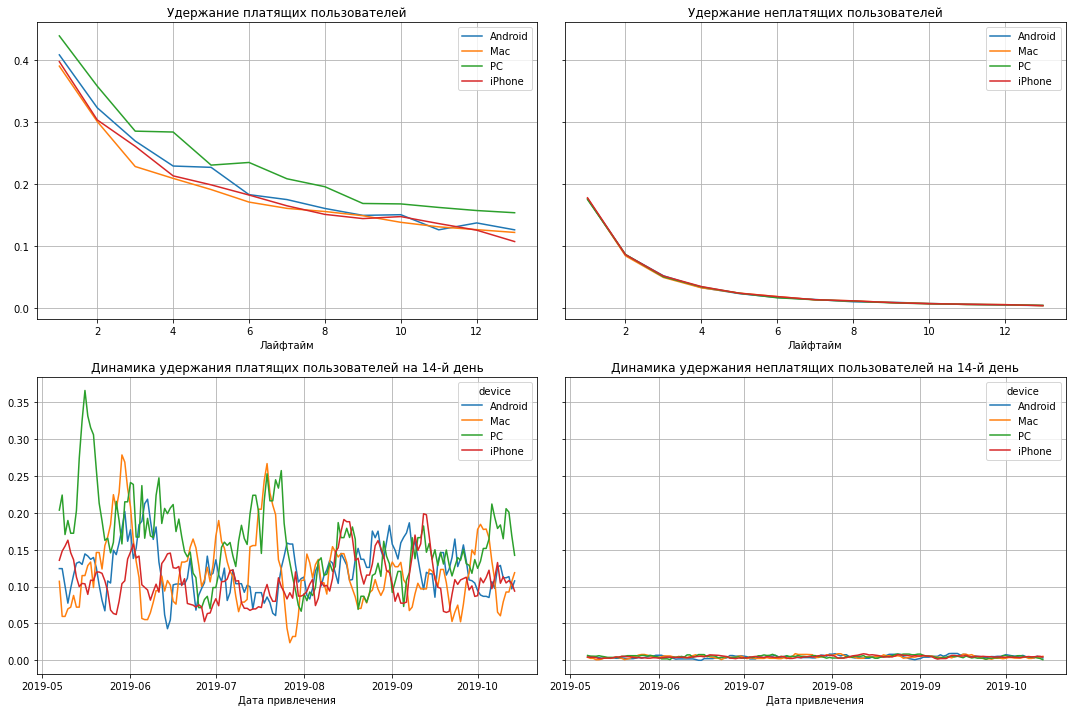

In [120]:
result_raw, retention, retention_history = get_retention(profiles,
                                                            visits,
                                                            observ_date,
                                                            horizon_days,
                                                            dimensions=['device'])
plot_retention(retention, retention_history, horizon_days, window=7)

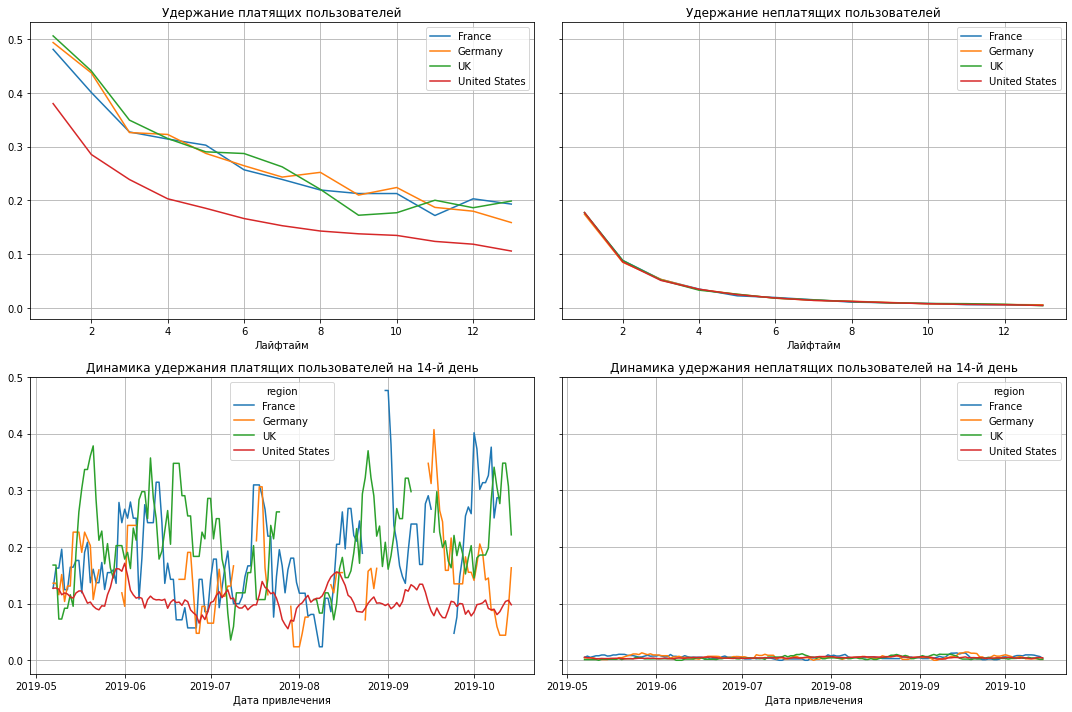

In [121]:
result_raw, retention, retention_history = get_retention(profiles,
                                                            visits,
                                                            observ_date,
                                                            horizon_days,
                                                            dimensions=['region'])
plot_retention(retention, retention_history, horizon_days, window=7)

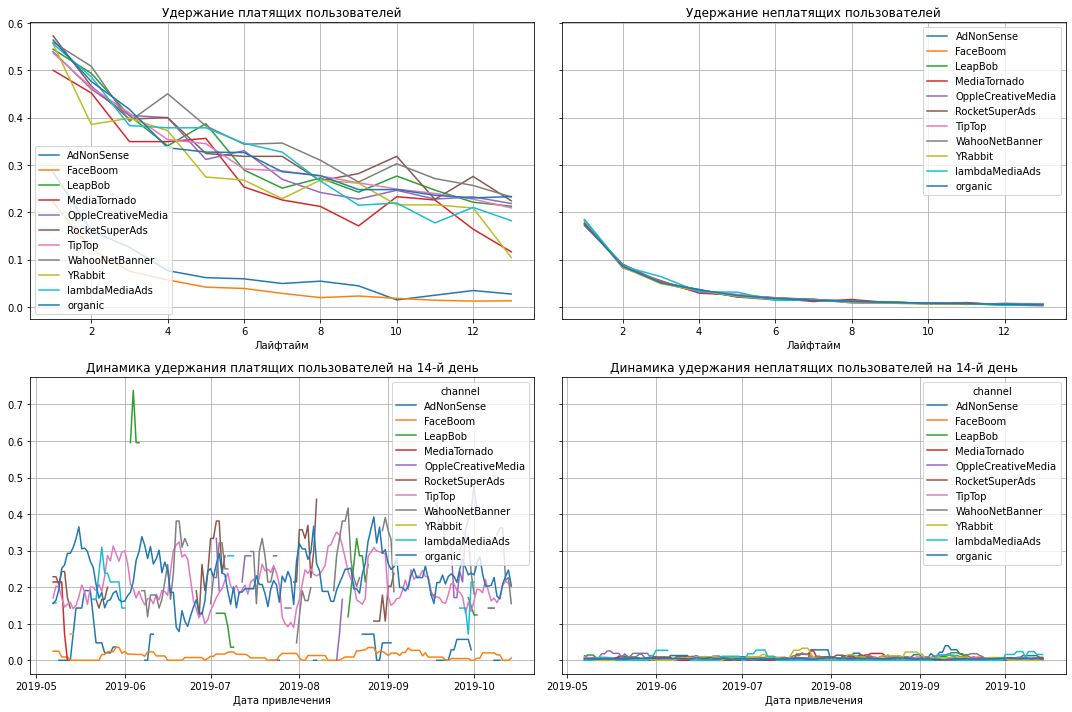

In [122]:
result_raw, retention, retention_history = get_retention(profiles,
                                                            visits,
                                                            observ_date,
                                                            horizon_days,
                                                            dimensions=['channel'])
plot_retention(retention, retention_history, horizon_days, window=7)

Лучшее удержание у пользователей ПК. По странам удержание США сильно ниже, чем у европейских стран. Так как много пользователей приходит с канала FaceBoom, а по графику у него топ2 из худших удержаний, возможно стоит подумать об отказе закупки пользователей в нём.

# Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Как было сказано выше, основная причина неэффективности привлечения пользователей - сильные скачки стоимости пользователей в сети тикток. Настоятельно рекомендую ограничить поток денег в этот канал до минимума!

Дело тут не в том, что канал "плохой". Наоборот, один из самых мощных LTV. Но стоимость пользователей очень большая. Если выяснится, что это ошибка на стороне ТикТока, то в этом канале настоятельно рекомендуется закупать пользователей и дальше, за меньшую стоимость.

Также рекомендую тонко отрегулировать денежные потоки в каналы Фейсбука и АдСенса, потому что они сейчас тоже убыточны.

Лучше всего будет перераспределить деньги с убыточных каналов, на самые прибыльные.

Например, lambdaMediaAds, RocketSuperAds, YRabbit, MediaTornado

Отмечу, что регион США у нас убыточный из за канала привлечения ТикТока. Менять направление развития с Америки на Европу в данном случае точно не стоит. У этой страны хороший LTV, в перспективе она приносит хорошие деньги, если грамотно распределить деньги на рекламу.